In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import matplotlib

%matplotlib inline

In [68]:
df = pd.read_csv("Raw Counts National Parkland Voter Reg.csv")
df

,State_Code,State,reg_date_time_period,Total Registered,18_29,30_39,40_49,50_64,65_,Unknown,Number of Days Included
0,AK,Alaska,Post-Parkland,12022,11.50,14.23,11.92,20.29,12.23,29.83,76
1,AK,Alaska,Pre-Parkland,38169,11.41,12.78,11.26,18.32,9.15,37.08,76
2,AL,Alabama,Post-Parkland,30178,42.46,18.46,14.06,16.53,8.49,0.01,54
3,AL,Alabama,Pre-Parkland,29487,40.35,19.01,14.51,17.29,8.82,0.01,54
4,AZ,Arizona,Post-Parkland,25963,44.27,15.19,10.55,15.83,14.17,0.00,50
5,AZ,Arizona,Pre-Parkland,32395,36.11,15.20,11.28,18.80,18.61,0.00,50
6,CA,California,Post-Parkland,975820,33.04,20.05,13.96,18.82,14.10,0.03,106
7,CA,California,Pre-Parkland,596347,29.67,23.34,15.71,19.14,12.12,0.01,106
8,CO,Colorado,Post-Parkland,79062,37.47,25.29,13.06,15.41,8.77,0.00,107
9,CO,Colorado,Pre-Parkland,77380,35.13,26.07,13.79,15.97,9.04,0.00,107


In [13]:
count = pd.read_csv("Raw Counts-Table 1.csv")
count = count.drop('Unnamed: 4', axis=1)
count.head(10)

,vf_source_state,reg_date_time_period,age_bucket,Count
0,AK,Post-Parkland,18-29,1372
1,AK,Post-Parkland,30-39,1719
2,AK,Post-Parkland,40-49,1433
3,AK,Post-Parkland,50-64,2438
4,AK,Post-Parkland,65+,1474
5,AK,Post-Parkland,Unknown,3586
6,AK,Pre-Parkland,18-29,4285
7,AK,Pre-Parkland,30-39,4896
8,AK,Pre-Parkland,40-49,4286
9,AK,Pre-Parkland,50-64,7023


In [14]:
youthonly = df.drop('30_39', axis=1)
youthonly = youthonly.drop('40_49', axis=1)
youthonly = youthonly.drop('50_64', axis=1)
youthonly = youthonly.drop('65_', axis=1)
youthonly = youthonly.drop('Unknown', axis=1)
youthonly = youthonly.drop('Number of Days Included', axis=1)

In [15]:
youthonly.sort_values('18_29', ascending=False).head()

,State_Code,State,reg_date_time_period,Total Registered,18_29
22,IN,Indiana,Post-Parkland,29468,67.78
75,WV,West Virginia,Pre-Parkland,15349,61.94
54,PA,Pennsylvania,Post-Parkland,52640,61.38
23,IN,Indiana,Pre-Parkland,17439,57.91
38,NE,Nebraska,Post-Parkland,11509,57.16


## By the Numbers: Which States Registered the Most New Voters Before Parkland 

In [16]:
PreParkland = df[df.reg_date_time_period == 'Pre-Parkland']
PreParkland.sort_values('Total Registered', ascending=False).head(10)

,State_Code,State,reg_date_time_period,Total Registered,18_29,30_39,40_49,50_64,65_,Unknown,Number of Days Included
7,CA,California,Pre-Parkland,596347,29.67,23.34,15.71,19.14,12.12,0.01,106
47,NY,New York,Pre-Parkland,351076,46.05,20.50,11.96,13.86,7.62,0.01,320
63,TX,Texas,Pre-Parkland,280142,40.18,20.05,14.23,16.14,9.40,0.00,101
53,OR,Oregon,Pre-Parkland,125076,32.36,23.08,13.99,17.20,13.37,0.01,49
49,OH,Ohio,Pre-Parkland,121461,35.62,21.73,14.60,17.94,10.10,0.00,114
17,FL,Florida,Pre-Parkland,105941,26.23,16.09,13.21,24.02,20.45,0.00,75
19,GA,Georgia,Pre-Parkland,100930,38.48,22.08,14.82,16.61,8.00,0.02,54
37,NC,North Carolina,Pre-Parkland,96512,38.67,18.37,13.29,18.22,11.45,0.00,114
9,CO,Colorado,Pre-Parkland,77380,35.13,26.07,13.79,15.97,9.04,0.00,107
33,MN,Minnesota,Pre-Parkland,75909,31.22,25.37,13.81,16.43,13.17,0.00,85


## By the Numbers: Which States Registered the Most New Voters After Parkland 

In [17]:
PostParkland = df[df.reg_date_time_period == 'Post-Parkland']
PostParkland.sort_values('Total Registered', ascending=False).head(10)

,State_Code,State,reg_date_time_period,Total Registered,18_29,30_39,40_49,50_64,65_,Unknown,Number of Days Included
6,CA,California,Post-Parkland,975820,33.04,20.05,13.96,18.82,14.10,0.03,106
62,TX,Texas,Post-Parkland,273215,40.30,20.00,13.85,16.29,9.56,0.00,101
48,OH,Ohio,Post-Parkland,209599,41.57,19.43,12.76,15.95,10.29,0.01,114
46,NY,New York,Post-Parkland,123616,56.75,15.80,9.74,11.58,6.07,0.06,320
36,NC,North Carolina,Post-Parkland,122886,44.18,17.28,12.16,16.55,9.84,0.00,114
16,FL,Florida,Post-Parkland,114622,34.22,15.70,12.68,20.90,16.51,0.00,75
18,GA,Georgia,Post-Parkland,111215,39.36,22.29,14.79,15.65,7.88,0.02,54
52,OR,Oregon,Post-Parkland,93134,33.99,23.53,13.90,16.69,11.89,0.01,49
72,WI,Wisconsin,Post-Parkland,81813,14.07,16.38,11.24,19.05,13.39,25.87,83
64,UT,Utah,Post-Parkland,79646,30.42,21.87,14.37,16.67,16.64,0.02,106


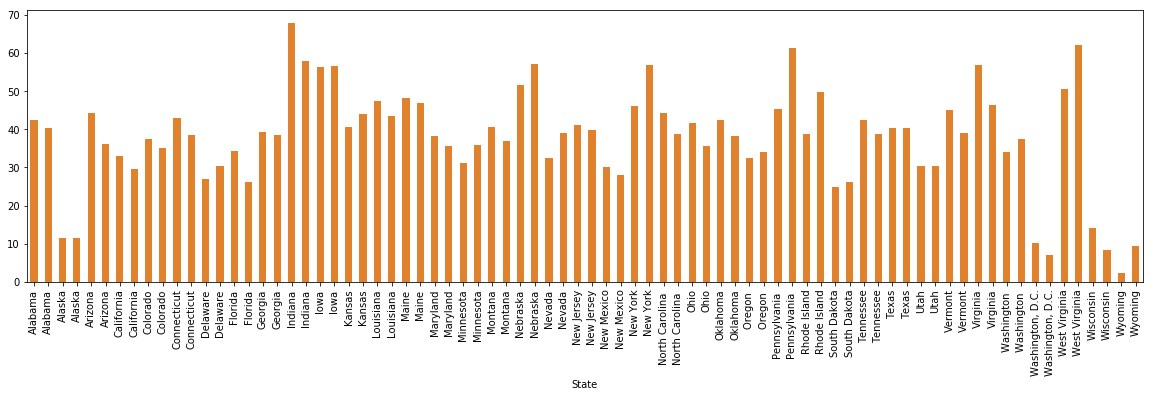

In [18]:
bar_colors = ['#DF812D'] 

df.sort_values(by='State', ascending=True).plot(kind='bar', x='State', y='18_29', figsize=(20, 5), color=bar_colors, legend=False)

In [62]:
percent_change = pd.read_csv("percent_change.csv")
percent_change = percent_change.sort_values(by='Percent_Change', ascending=False)

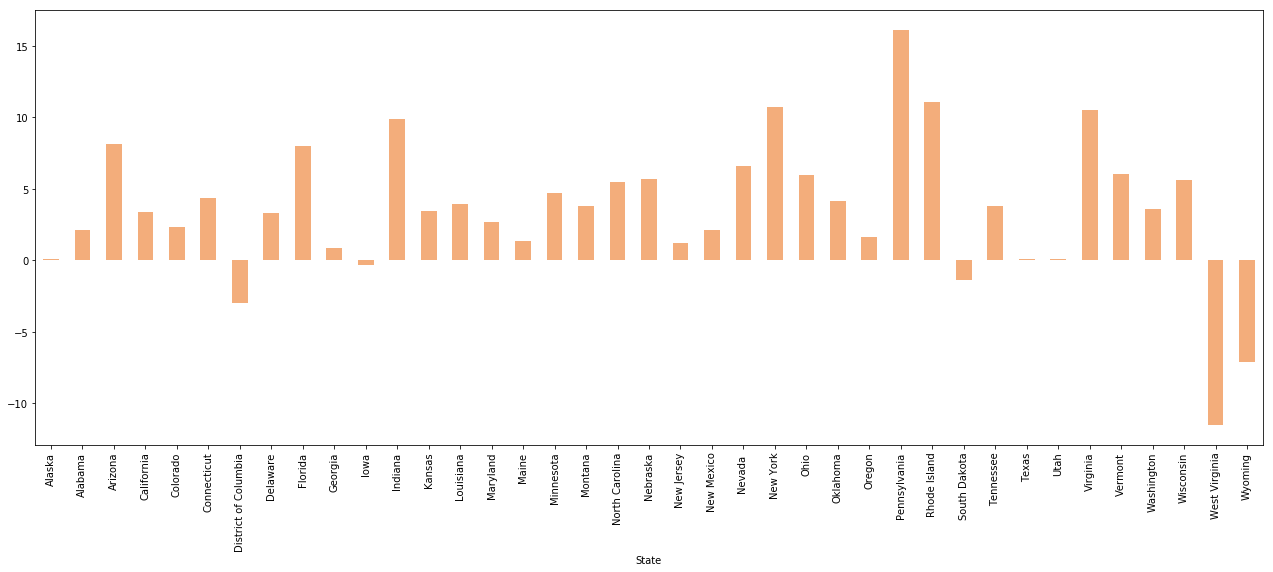

In [67]:
ax = pd.read_csv("percent_change.csv")
ax.plot(kind='bar', x='State', y='Percent_Change', figsize=(22, 8), legend=False, color='#F3AD7B')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("youth_change_wide.pdf")
plt.show()

## Iowa

In [20]:
iowa = df[(df['State']=='Iowa')]

In [21]:
iowa_count = count[(count['vf_source_state']=='IA')]
iowa_count

,vf_source_state,reg_date_time_period,age_bucket,Count
115,IA,Post-Parkland,18-29,11324
116,IA,Post-Parkland,30-39,3251
117,IA,Post-Parkland,40-49,1703
118,IA,Post-Parkland,50-64,2334
119,IA,Post-Parkland,65+,1529
120,IA,Pre-Parkland,18-29,10594
121,IA,Pre-Parkland,30-39,2979
122,IA,Pre-Parkland,40-49,1792
123,IA,Pre-Parkland,50-64,2183
124,IA,Pre-Parkland,65+,1196


In [22]:
iowa_count.dtypes

vf_source_state         object
reg_date_time_period    object
age_bucket              object
Count                    int64
dtype: object

In [23]:
IAPre = iowa_count[(iowa_count['reg_date_time_period']=='Pre-Parkland')]
IAPost = iowa_count[(iowa_count['reg_date_time_period']=='Post-Parkland')]

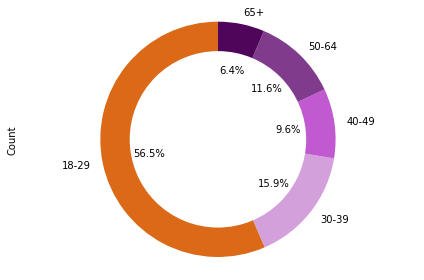

In [56]:
#IOWA NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A']
labels = ['18-29', '30-39', '40-49', '50-64', '65+']
explode = (0.05, 0, 0, 0, 0)

ax = IAPre.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Iowa_Pre.pdf")
plt.show()

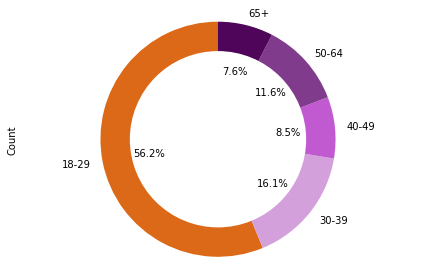

In [54]:
#IOWA NEW VOTERS AFTER PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A']
labels = ['18-29', '30-39', '40-49', '50-64', '65+']

ax = IAPost.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Iowa_Post.pdf")
plt.show()

## Florida

In [37]:
florida = df[(df['State']=='Florida')]

In [38]:
florida_count = count[(count['vf_source_state']=='FL')]
florida_count

,vf_source_state,reg_date_time_period,age_bucket,Count
91,FL,Post-Parkland,18-29,39218
92,FL,Post-Parkland,30-39,17991
93,FL,Post-Parkland,40-49,14538
94,FL,Post-Parkland,50-64,23953
95,FL,Post-Parkland,65+,18919
96,FL,Post-Parkland,Unknown,3
97,FL,Pre-Parkland,18-29,27789
98,FL,Pre-Parkland,30-39,17045
99,FL,Pre-Parkland,40-49,13994
100,FL,Pre-Parkland,50-64,25448


In [39]:
florida_count.dtypes

vf_source_state         object
reg_date_time_period    object
age_bucket              object
Count                    int64
dtype: object

In [40]:
FLPre = florida_count[(florida_count['reg_date_time_period']=='Pre-Parkland')]
FLPost = florida_count[(florida_count['reg_date_time_period']=='Post-Parkland')]

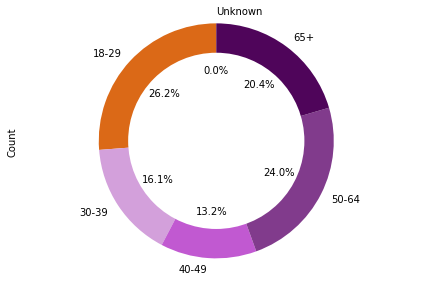

In [53]:
#Florida NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = FLPre.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Florida_Pre.pdf")
plt.show()

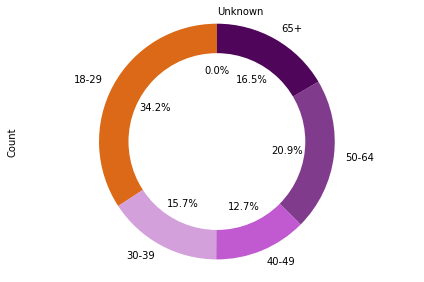

In [50]:
#Florida NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = FLPost.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Florida_Post.pdf")
plt.show()

## Wisconsin 

In [37]:
Wisconsin = df[(df['State']=='Wisconsin')]

In [69]:
wisconsin_count = count[(count['vf_source_state']=='WI')]
wisconsin_count

,vf_source_state,reg_date_time_period,age_bucket,Count
409,WI,Post-Parkland,18-29,11486
410,WI,Post-Parkland,30-39,13463
411,WI,Post-Parkland,40-49,9197
412,WI,Post-Parkland,50-64,15600
413,WI,Post-Parkland,65+,10901
414,WI,Post-Parkland,Unknown,21166
415,WI,Pre-Parkland,18-29,1799
416,WI,Pre-Parkland,30-39,2452
417,WI,Pre-Parkland,40-49,2194
418,WI,Pre-Parkland,50-64,4013


In [70]:
wisconsin_count.dtypes

vf_source_state         object
reg_date_time_period    object
age_bucket              object
Count                    int64
dtype: object

In [71]:
WIPre = wisconsin_count[(wisconsin_count['reg_date_time_period']=='Pre-Parkland')]
WIPost = wisconsin_count[(wisconsin_count['reg_date_time_period']=='Post-Parkland')]

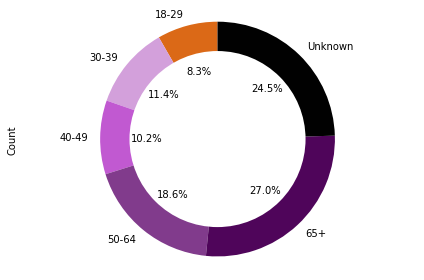

In [72]:
#WISCONSIN NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = WIPre.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("WI_Pre.pdf")
plt.show()

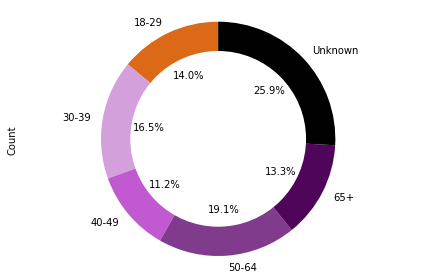

In [73]:
#WISCONSIN NEW VOTERS AFTER PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = WIPost.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("WI_Post.pdf")
plt.show()

## Ohio 

In [74]:
Ohio = df[(df['State']=='Ohio')]

In [75]:
ohio_count = count[(count['vf_source_state']=='OH')]
ohio_count

,vf_source_state,reg_date_time_period,age_bucket,Count
270,OH,Post-Parkland,18-29,87122
271,OH,Post-Parkland,30-39,40718
272,OH,Post-Parkland,40-49,26738
273,OH,Post-Parkland,50-64,33425
274,OH,Post-Parkland,65+,21569
275,OH,Post-Parkland,Unknown,27
276,OH,Pre-Parkland,18-29,43259
277,OH,Pre-Parkland,30-39,26395
278,OH,Pre-Parkland,40-49,17738
279,OH,Pre-Parkland,50-64,21796


In [76]:
ohio_count.dtypes

vf_source_state         object
reg_date_time_period    object
age_bucket              object
Count                    int64
dtype: object

In [77]:
OHPre = ohio_count[(ohio_count['reg_date_time_period']=='Pre-Parkland')]
OHPost = ohio_count[(ohio_count['reg_date_time_period']=='Post-Parkland')]

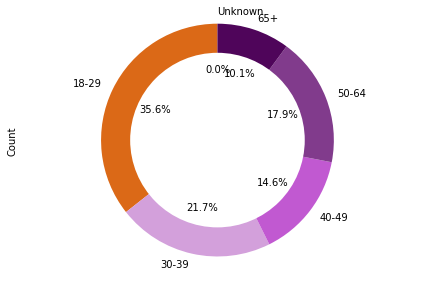

In [78]:
#OHIO NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = OHPre.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Ohio_Pre.pdf")
plt.show()

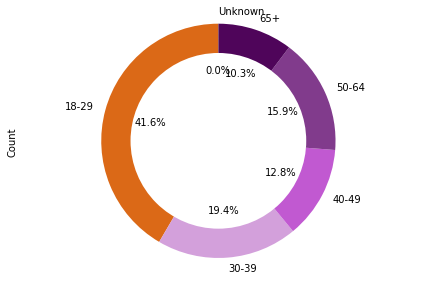

In [79]:
#OHIO NEW VOTERS AFTER PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = OHPost.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Ohio_Post.pdf")
plt.show()

## Pennsylvania 

In [80]:
Pennsylvania = df[(df['State']=='Pennsylvania')]

In [81]:
penn_count = count[(count['vf_source_state']=='PA')]
penn_count

,vf_source_state,reg_date_time_period,age_bucket,Count
305,PA,Post-Parkland,18-29,32310
306,PA,Post-Parkland,30-39,7086
307,PA,Post-Parkland,40-49,4531
308,PA,Post-Parkland,50-64,5401
309,PA,Post-Parkland,65+,3311
310,PA,Post-Parkland,Unknown,1
311,PA,Pre-Parkland,18-29,18450
312,PA,Pre-Parkland,30-39,7658
313,PA,Pre-Parkland,40-49,5062
314,PA,Pre-Parkland,50-64,6026


In [82]:
penn_count.dtypes

vf_source_state         object
reg_date_time_period    object
age_bucket              object
Count                    int64
dtype: object

In [83]:
PennPre = penn_count[(penn_count['reg_date_time_period']=='Pre-Parkland')]
PennPost = penn_count[(penn_count['reg_date_time_period']=='Post-Parkland')]

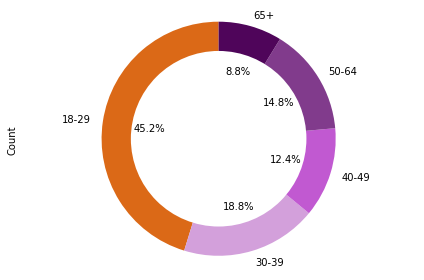

In [84]:
#PENNSYLVANIA NEW VOTERS BEFORE PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = PennPre.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Penn_Pre.pdf")
plt.show()

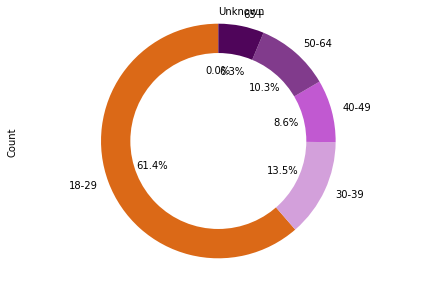

In [85]:
#PENNSYLVANIA NEW VOTERS AFTER PARKLAND 

colors = ['#DB6917','#D3A0DB','#C159D1', '#813B8C', '#4F055A', '#010101']
labels = ['18-29', '30-39', '40-49', '50-64', '65+', 'Unknown']

ax = PennPost.plot.pie(y='Count', colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, legend=False)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("Penn_Post.pdf")
plt.show()